In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data=pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


C:\Users\Shirisha\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

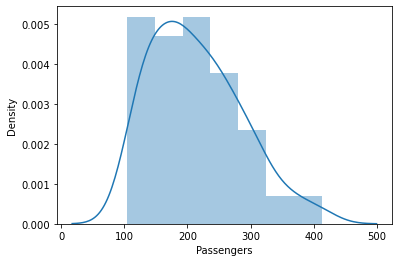

In [7]:
sns.distplot(data['Passengers'])

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

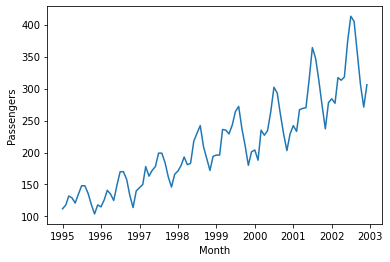

In [8]:
sns.lineplot(x='Month',y='Passengers',data=data)

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0., 17., 39., 40.],
        [96.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([104.0, 1295.8, 2487.6, 3679.3999999999996, 4871.2, 6063.0,
        7254.799999999999, 8446.6, 9638.4, 10830.199999999999, 12022.0],
       dtype=object),
 <a list of 2 BarContainer objects>)

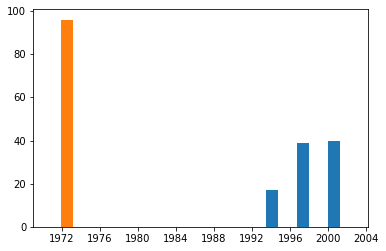

In [9]:
plt.hist(data)

In [10]:
data['Months'] =pd.DatetimeIndex(data['Month'])
data['Months'] = data['Month'].dt.strftime('%b')
data

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May
...,...,...,...
91,2002-08-01,405,Aug
92,2002-09-01,355,Sep
93,2002-10-01,306,Oct
94,2002-11-01,271,Nov


In [11]:
dummy=pd.get_dummies(data['Months'])
dummy
df=pd.concat([data,dummy],axis=1)
df

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
df['t']=np.arange(1.,97)
df['t_sq']=df['t']**2
df['log_pass']=np.log(df['Passengers'])
df

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_pass
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2.0,4.0,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3.0,9.0,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4.0,16.0,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5.0,25.0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92.0,8464.0,6.003887
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93.0,8649.0,5.872118
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94.0,8836.0,5.723585
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95.0,9025.0,5.602119


In [13]:
Train = df.head(75)
Test = df.tail(25)

In [14]:
linear_model = smf.ols('Passengers~t',data=Train).fit()                                  #Linear
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  51.838097495845105


In [15]:
Exp_model = smf.ols('log_pass~t',data=Train).fit()                                       #Exponential
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  42.775259750198174


In [16]:
Quad_model = smf.ols('Passengers~t+t_sq',data=Train).fit()                                 #Quadratic
pred_Quad = pd.Series(Quad_model.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  54.031406456254345


In [17]:
add_sea_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()       # Additive seasonality
pred_add_sea = pd.Series(add_sea_model.predict(Test))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  123.02763788084239


In [18]:
add_sea_Quad_model = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()    #Additive Seasonality Quadratic
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(Test))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 36.53627444546645


In [19]:
Mul_sea_model = smf.ols('log_pass~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()       # Multiplicative Seasonality
pred_Mult_sea = pd.Series(Mul_sea_model.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 128.16622817596135


In [20]:
Mul_Add_sea_model = smf.ols('log_pass~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()    # Multiplicative Additive Seasonality
pred_Mult_add_sea = pd.Series(Mul_Add_sea_model.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 11.56582543768609


In [21]:
T = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
'RMSE Value':pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(T)
table_rmse

,MODEL,RMSE Value
0,rmse_linear,51.838097
1,rmse_Exp,42.775260
2,rmse_Quad,54.031406
3,rmse_add_sea,123.027638
4,rmse_add_sea_quad,36.536274
5,rmse_Mult_sea,128.166228
6,rmse_Mult_add_sea,11.565825


In [22]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [23]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))                       # Create dummies and T and T-Squared columns
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["t"] = np.arange(1,13)
forecast1["t_sq"] = forecast1["t"]*forecast1["t"]
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_sq  
0    0  1     1  
1    0  2     4  
2    0  3     9  
3    0  4    16  
4    0  5    25  


In [24]:
model_full = smf.ols('log_pass~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =df).fit()     
pred_new = pd.Series(model_full.predict(forecast1))                               # Forecasting using Multiplicative Additive Seasonality Model
forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [25]:
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']]                # Final Prediction for next 12 months
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736
